<a href="https://colab.research.google.com/github/W8andHope/scripts/blob/main/simula.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st 
import random

In [ ]:
def current_milli_time():
    return round(time.thread_time() * 10000)

Números pseduoaleatorios:  [0.749827, 0.956872, 0.486499, 0.755604, 0.060849, 0.843857, 0.264569, 0.187625, 0.677544, 0.017744, 0.322068, 0.828208, 0.022793, 0.401076, 0.735973, 0.147404, 0.708207, 0.591717, 0.476306, 0.826562, 0.113412, 0.16113, 0.949777, 0.421359, 0.937019, 0.36574, 0.069793, 0.898842, 0.516136, 0.130762, 0.524702, 0.28288, 0.461322, 0.915861, 0.666165, 0.392382, 0.903838, 0.822025, 0.189512, 0.406664, 0.402079, 0.049023, 0.52797, 0.742345, 0.304065, 0.562827, 0.632629, 0.476134, 0.112857, 0.582364, 0.560029, 0.297896, 0.151776, 0.244983, 0.039238, 0.728364, 0.576312, 0.560009, 0.940297, 0.085874, 0.529572, 0.509756, 0.315902, 0.4365, 0.988174, 0.907373, 0.438218, 0.511962, 0.595432, 0.370908, 0.002665, 0.329681, 0.528732, 0.522951, 0.420589, 0.999361, 0.19795, 0.275244, 0.872664, 0.950462, 0.321816, 0.807621, 0.544917, 0.56496, 0.679065, 0.600663, 0.21924, 0.949736, 0.581284, 0.631437, 0.140278, 0.333009, 0.8643, 0.591698, 0.830547, 0.319153, 0.945006, 0.737927, 0.2

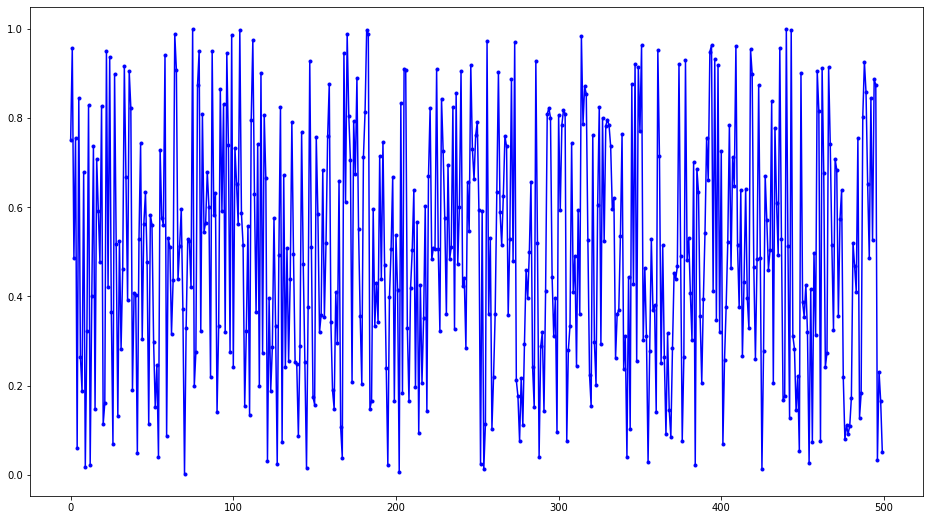

In [ ]:
n = 1000
values = []
#la semilla será dinámica, se usa el tiempo del sistema local 
#multiplicado por un número aleatorio de la librería random
ini = round(current_milli_time() * random.random())

#definimos la función del GLC
def glc(modulus, a, c, seed):
      global i 
      i = 0
      while i < n: 
        seed = (a * seed + c) % modulus
        values.append(round(seed/(modulus-1),6))
        i += 1

#introducimos los valores iniciales
glc(2**32,1103515245,12345,ini)
print("Números pseduoaleatorios: ",values)

#guardado de data en archivos .csv y .txt
name=str(ini)
df = pd.DataFrame({'':values}) 
df.to_csv('numeros.csv', index=False,sep=';',decimal='.')
df.to_csv('numeros.txt', index=False,sep=';',decimal='.')

#ploteo
plt.figure(figsize=(16,9))
plt.plot(range(500),values[0:500], marker=".", color="blue")
plt.show()

In [ ]:
#Minigenerador usando los mismo parámetros, este lo usaremos para la simulación
def mglc ():
  global a, c, modulus, seed
  seed = round(current_milli_time() * random.random())
  a = 1103515245
  c = 12345
  modulus = 2**32
  seed = (a * seed + c) % modulus
  return round(seed/(modulus-1),6)

In [ ]:
def simulacion(n):
  global sum1, sum2, p1, p2
  sum1 = 0
  sum2 = 0
  ncaja = 0
  cajas = list( {} for ncaja in range(n))
  while ncaja < n:
      #primer evento: selección de caja a inspeccionar
      r=mglc()
      if (r<=0.3):
        cajas[ncaja]["estado_caja"] = 1
      else:
        cajas[ncaja]["estado_caja"] = 0

      #segundo evento: cantidad de productos seleccionados a inspeccionar
      r=mglc()
      if (cajas[ncaja]["estado_caja"]==0):
        cajas[ncaja]["productos_seleccionados"]=0
      else: 
        if (r>0.8):
          cajas[ncaja]["productos_seleccionados"]=3
        else: 
          if (r>0.5):
            cajas[ncaja]["productos_seleccionados"]=2
          else:
            cajas[ncaja]["productos_seleccionados"]=1
      #tercer evento: estado de los productos de la caja
      r=mglc()
      if (r<=0.03):
        cajas[ncaja]["estado_producto"] = 1
      else:
        cajas[ncaja]["estado_producto"] = 0

      #cuarto evento: inspección de productos seleccionados : productos defectuosos encontrados
      r=mglc()
      if (cajas[ncaja]["estado_caja"]==0):
        cajas[ncaja]["productos_defectuosos_encontrados"] = 0
      else:
        if (cajas[ncaja]["estado_producto"] == 0):
          cajas[ncaja]["productos_defectuosos_encontrados"] = 0
        else: 
          if (r<=(cajas[ncaja]["productos_seleccionados"]*0.1)):
            cajas[ncaja]["productos_defectuosos_encontrados"] = 1
          else:
            cajas[ncaja]["productos_defectuosos_encontrados"] = 0
      sum1 = sum1 + cajas[ncaja]["productos_defectuosos_encontrados"]

      #cuarto evento: inspección de productos seleccionados : productos defectuosos no encontrados
      if (cajas[ncaja]["estado_producto"]==0):
        cajas[ncaja]["productos_defectuosos_no_encontrados"] = 0
      else:
        if (cajas[ncaja]["estado_caja"] == 0):
          cajas[ncaja]["productos_defectuosos_no_encontrados"] = 1
        else: 
          if (r<=(cajas[ncaja]["productos_seleccionados"]*0.1)):
            cajas[ncaja]["productos_defectuosos_no_encontrados"] = 0
          else:
            cajas[ncaja]["productos_defectuosos_no_encontrados"] = 1
      sum2 = sum2 + cajas[ncaja]["productos_defectuosos_no_encontrados"]

      #mostrar cajas 
      print("CAJA",ncaja+1,":",cajas[ncaja],"\n")
      ncaja += 1

  p1 = sum1 / n
  p2 = sum2 / n
  print("Probabilidad de encontrar una caja con productos defectuosos en la inspección: ",p1,"\n")
  print("Probabilidad de que una caja con productos defectuosos pase la inspección: ",p2)   


simulacion(1000)


CAJA 1 : {'estado_caja': 0, 'productos_seleccionados': 0, 'estado_producto': 0, 'productos_defectuosos_encontrados': 0, 'productos_defectuosos_no_encontrados': 0} 

CAJA 2 : {'estado_caja': 0, 'productos_seleccionados': 0, 'estado_producto': 0, 'productos_defectuosos_encontrados': 0, 'productos_defectuosos_no_encontrados': 0} 

CAJA 3 : {'estado_caja': 0, 'productos_seleccionados': 0, 'estado_producto': 0, 'productos_defectuosos_encontrados': 0, 'productos_defectuosos_no_encontrados': 0} 

CAJA 4 : {'estado_caja': 1, 'productos_seleccionados': 1, 'estado_producto': 0, 'productos_defectuosos_encontrados': 0, 'productos_defectuosos_no_encontrados': 0} 

CAJA 5 : {'estado_caja': 1, 'productos_seleccionados': 1, 'estado_producto': 0, 'productos_defectuosos_encontrados': 0, 'productos_defectuosos_no_encontrados': 0} 

CAJA 6 : {'estado_caja': 1, 'productos_seleccionados': 3, 'estado_producto': 0, 'productos_defectuosos_encontrados': 0, 'productos_defectuosos_no_encontrados': 0} 

CAJA 7 : {